## Part 1: Generate alignment with SPAdes
    
`spades.py -1 /data/lab8/illumina_reads_R1.fastq.gz -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq --careful --cov-cutoff auto -o spades_assembly_all_illumina -t 1`
    
left on screen starting 10/11/18 5:10pm PST

output in `cd ~/fa18-BioE131/lab08/spades_assembly_all_illumina`

Question:
- Why do we expect short reads to produce a more fragmented assembly than long reads? 
> In general, more short reads are needed to produce the same coverage as a long reads data. The contigs are shorter and there're many contigs, also there may be regions that are not being covered in the reads due to the short read length. For example, the repetitive regions may be considered as small fragments because the read length is unable to detect the larger patterns. All of the issues above lead to a more fragmented they long reads. Also, if the sequence is de novo and so a reference doesn't exist, repeated areas can cause a lot of difficulty in sequence assembly. Additional difficulties include base substitutions by inaccurate polymerases, chimeric sequences, and PCR-bias, all of which can contribute to generating an incorrect sequence.

- Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?  
> As PacBio requencing differs significantly from the Illumina sequencing in that there is no need for amplification during the library preparation, nor during the sequencing process, and it apply a movie capture of the polymerase activity, the signal to noise ratio is larger and so the error rate is also higher, as both mismatches and insertion proportion is larger than in a illunina sequencing.

## Assembly-stats
- Using the assembly-statsprogram, calculate statistics on both your contigs and scaffolds file
- Report the total length of all contigs (or scaffolds), the number of contigs (or scaffolds), and the N50 

Code Line: output a tabular analysis with headers
`assembly-stats -t ./spades_assembly_all_illumina/scaffolds.fasta ./spades_assembly_all_illumina/contigs.fasta > ./assembly_stats_report.txt`

In [8]:
import pandas as pd
data = pd.read_csv('assembly_stats_report.csv',sep = "	")
data

filename  total_length  number  \
0  ./spades_assembly_all_illumina/scaffolds.fasta       6658426     143   
1    ./spades_assembly_all_illumina/contigs.fasta       6654856     149   

   mean_length  longest  shortest  N_count  Gaps     N50  N50n     N70  N70n  \
0     46562.42   537743       128      144     7  332489     8  207869    14   
1     44663.46   489856       128        0     0  230325    10  168584    16   

     N90  N90n  
0  92098    24  
1  81820    28

In [13]:
df1 = data[['filename','total_length',"number","N50"]]
df1

filename  total_length  number  \
0  ./spades_assembly_all_illumina/scaffolds.fasta       6658426     143   
1    ./spades_assembly_all_illumina/contigs.fasta       6654856     149   

      N50  
0  332489  
1  230325

- Why is N50 is useful statistic to calculate?  
> N50 is useful in that if evaluates the assembly quality in terms of contiguity, as it's defined as the senquence length of the shortest contig at 50% of the total genome length. It is useful to generate the distributive analysis and a half cut in terms of contig.
- Why not just list the mean or median contig length?   
> The mean and median contig length does not take into account of the contiguity and the total length of the read length being assemblied. In that way, the mean and median is not a even cut point in terms of the number of bases
- In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?  
> Scaffolds are longer than contigs, around 50% longer N50 and much longer in terms of longest and mean segments

## Extra Credit:
- Extract the coverage from each FASTA header
code: apply grep and awk, use ">" to separate each fasta, "_" to separate names, and print the name, length and coverage field
`grep '^>'  contigs.fasta | awk -F _  'BEGIN {OFS="\t"} {print $0,$4,$6}'`
- plot a histogram of coverage for all contigs in your assembly

                                 name  length  Coverage
1  >NODE_2_length_468307_cov_8.954830  468307  8.954830
2  >NODE_3_length_460222_cov_8.835066  460222  8.835066
3  >NODE_4_length_432255_cov_8.768225  432255  8.768225
4  >NODE_5_length_352739_cov_8.419214  352739  8.419214


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c502cb00>]],
      dtype=object)

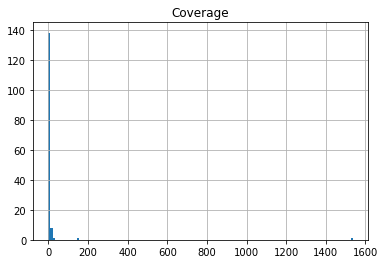

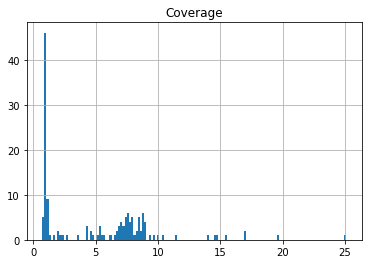

In [37]:
import pandas as pd
data = pd.read_csv('contig_cov.csv',sep = "	", header = None,names = ["name", "length","Coverage"])
# A demonstration of the first five lines
print(data[1:5])
# extract the second column as the coverage
cov = data[["Coverage"]]
cov.hist(bins=149)

# removing the single extremely high anomaly (multiple G and multiple T)for a closer look
cov2 = data[0:147][["Coverage"]]
cov2.hist(bins=140)

- Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal? 
> The coverage is not uniformly distributed, and has a closest look of bimodal  
- What explains the presence of contigs with coverage an integer multiple of the mean coverage?
> mean coverage = total mapped reads time/total reference length, and so the contig coverage = K * total mapped reads time/total reference length. A possible explanation is that the contig length is a 1/k of the total length, where k is a positive integer larger than 1, also the read time will be a 1/k' of the total read times. If both two condition is satisfied, a contig converage could be a multiple of the mean coverage.


## Identify the taxonfrom which your genome originated
- “hypervariable regions”can be used to determine the taxonfrom which a 16S rRNA gene originated  
1) scan over the entire genome to locate copies of the 16S ribosomal RNA gene  
2) extract the 16S rRNA genes from your assembly   
3) compare these genes to a database of known 16S rRNA genes.

Terminal Code:
`rna_hmm3.py -i ./spades_assembly_all_illumina/contigs.fasta -o ./ran_hmm_out.txt`   
Inspect the output

In [38]:
import pandas as pd
data = pd.read_csv('ran_hmm_out.txt',sep = "	")
data

##seq_name    method feature   start     end  \
0     NODE_5_length_352739_cov_8.419214  rna_hmm3    rRNA   65159   68063   
1   NODE_21_length_103352_cov_10.011827  rna_hmm3    rRNA   37580   40484   
2     NODE_1_length_489856_cov_8.332587  rna_hmm3    rRNA     457    3361   
3     NODE_2_length_468307_cov_8.954830  rna_hmm3    rRNA  161099  164003   
4       NODE_98_length_451_cov_1.006173  rna_hmm3    rRNA     184     303   
5       NODE_98_length_451_cov_1.006173  rna_hmm3    rRNA     147     220   
6    NODE_13_length_195508_cov_8.764542  rna_hmm3    rRNA      49    1592   
7     NODE_2_length_468307_cov_8.954830  rna_hmm3    rRNA  159050  160594   
8     NODE_5_length_352739_cov_8.419214  rna_hmm3    rRNA   68568   70112   
9    NODE_32_length_47877_cov_11.378513  rna_hmm3    rRNA   46286   47829   
10  NODE_21_length_103352_cov_10.011827  rna_hmm3    rRNA   35531   37075   
11  NODE_21_length_103352_cov_10.011827  rna_hmm3    rRNA   40649   40763   
12   NODE_19_length_133461_cov_8.643403  rna_hmm3    rRNA  133332  133446   
13    NODE_5_length_352739_cov_8.419214  rna_hmm3    rRNA   64880   64994   
14    NODE_40_length_25337_cov_8.961166  rna_hmm3    rRNA       2     108   
15    NODE_1_length_489856_cov_8.332587  rna_hmm3    rRNA    3528    3642   
16    NODE_2_length_468307_cov_8.954830  rna_hmm3    rRNA  164170  164284   

          evalue strand  frame attribute  
0   0.000000e+00      -    NaN  23S_rRNA  
1   0.000000e+00      +    NaN  23S_rRNA  
2   0.000000e+00      +    NaN  23S_rRNA  
3   0.000000e+00      +    NaN  23S_rRNA  
4   6.500000e-36      +    NaN  23S_rRNA  
5   1.400000e-09      -    NaN  23S_rRNA  
6   0.000000e+00      -    NaN  16S_rRNA  
7   0.000000e+00      +    NaN  16S_rRNA  
8   0.000000e+00      -    NaN  16S_rRNA  
9   0.000000e+00      +    NaN  16S_rRNA  
10  0.000000e+00      +    NaN  16S_rRNA  
11  2.900000e-21      +    NaN   5S_rRNA  
12  3.800000e-21      -    NaN   5S_rRNA  
13  1.000000e-20      -    NaN   5S_rRNA  
14  1.600000e-20      +    NaN   5S_rRNA  
15  1.500000e-20      +    NaN   5S_rRNA  
16  1.400000e-20      +    NaN   5S_rRNA

## delete all lines within other than those containing 16S_rRNA genes

In [41]:
import pandas as pd
data = pd.read_csv('ran_hmm_out.GFF',sep = "	")
data

##seq_name    method feature   start     end  \
0   NODE_13_length_195508_cov_8.764542  rna_hmm3    rRNA      49    1592   
1    NODE_2_length_468307_cov_8.954830  rna_hmm3    rRNA  159050  160594   
2    NODE_5_length_352739_cov_8.419214  rna_hmm3    rRNA   68568   70112   
3   NODE_32_length_47877_cov_11.378513  rna_hmm3    rRNA   46286   47829   
4  NODE_21_length_103352_cov_10.011827  rna_hmm3    rRNA   35531   37075   

   evalue strand  frame attribute  
0       0      -    NaN  16S_rRNA  
1       0      +    NaN  16S_rRNA  
2       0      -    NaN  16S_rRNA  
3       0      +    NaN  16S_rRNA  
4       0      +    NaN  16S_rRNA

## use bedtools getfastato extract nucleic acid sequences of the 16S rRNA genes from your assembly
- specify the path to contigs.fasta with -fiand the path to the GFF file you obtained above, with -bed
- The output will be in FASTA format.
`bedtools getfasta -fi ./spades_assembly_all_illumina/contigs.fasta -bed ./ran_hmm_out.GFF -fo 16s_rRNA.fasta`
> The output is in fasta format named 16s_rRNA.fasta. For inspection:  
>NODE_13_length_195508_cov_8.764542:48-1592
CGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_2_length_468307_cov_8.954830:159049-160594
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_5_length_352739_cov_8.419214:68567-70112
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_32_length_47877_cov_11.378513:46285-47829
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTTGGGCCTTGGGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCG
>NODE_21_length_103352_cov_10.011827:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGGTGATCAGTCAGATTTGAACTGGGACATGGTCAAGACTGCTAGGGGAGGCAGCAGTGGGGAATATTGGAGAATGGGCGAAAGCCTGATCCAGCCATGCAGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGGACTTTAAGTTGGGGGGAATGGCAGTTACCTAATACGTAATTGTGTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

- open your web browser and head over to Ribosomal Database Project’s SeqMatch tool   
- upload the resulting FASTA file from the previous step.   
- This program will attempt to identify the 16S sequences as precisely as possible by comparing them to a database of high-quality, curated sequences, obtained from known bacteria.   
- Genus level identification and explanation
> Pseudomonas, from the hierarchy view of the result, all five fasta rRNA strains are computed as belong to the Pseudomonas genus, and thus it has a strong confidence to be a pseudomonas. Moreover, from the output seqmatch txt output, we can see that despite a variation between the matched species, all the matching result with high confidence are in the pseudomonas genus. 


## Genome annotation
upload genome to two remote annotation services that will perform the annotation automatically:   
1. RAST 
    1. register for an account
    2. Run fasta
2. BASys   
3. DFAST 

### RAST Result

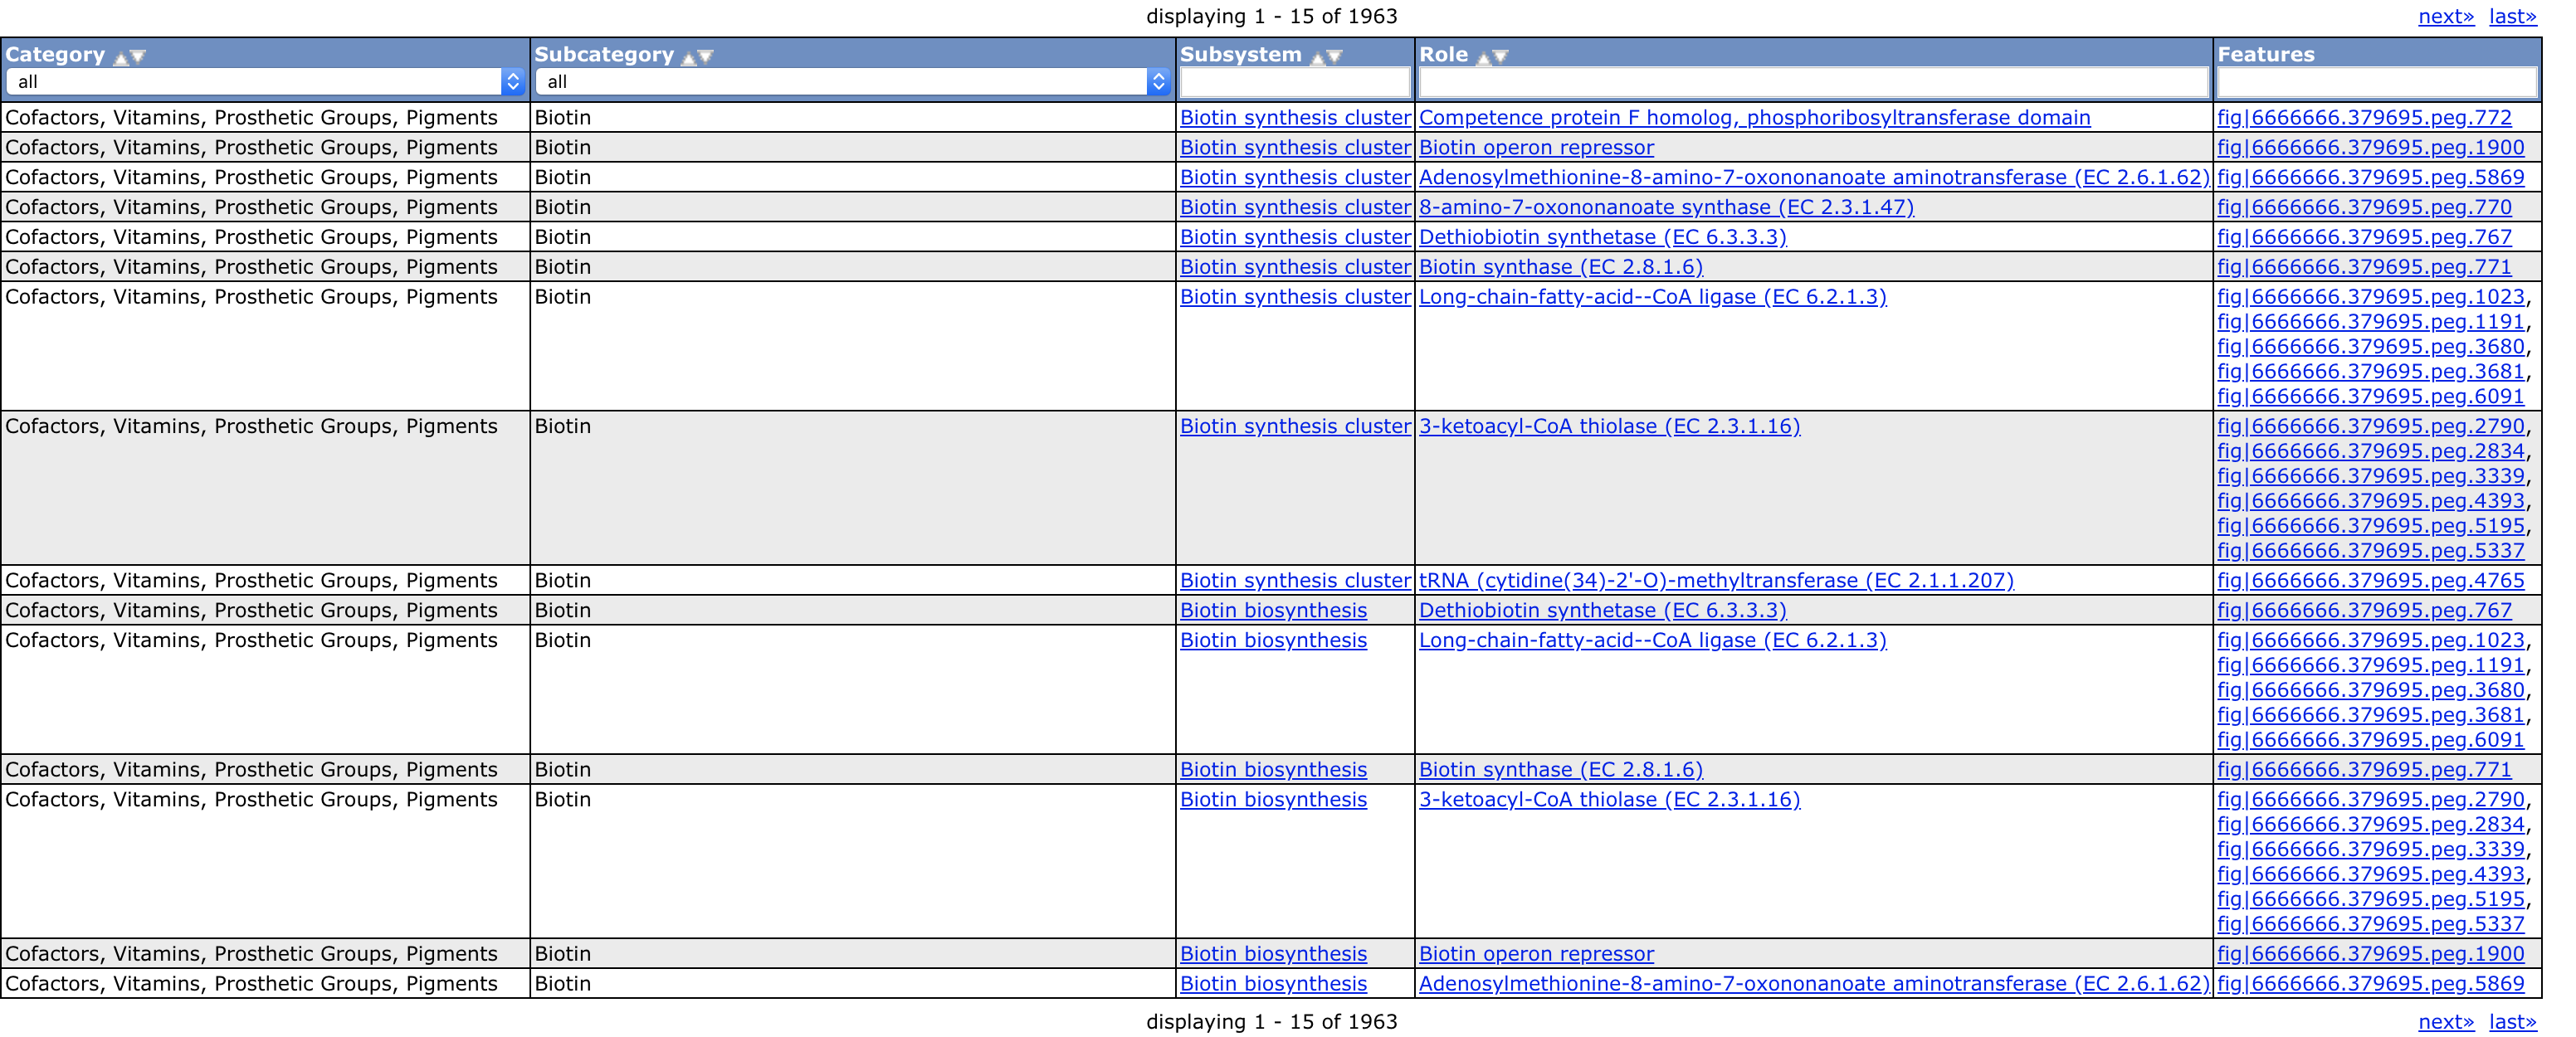

In [1]:
from IPython.display import Image, display
img6 = Image(filename = "RAST_table.png")
img6

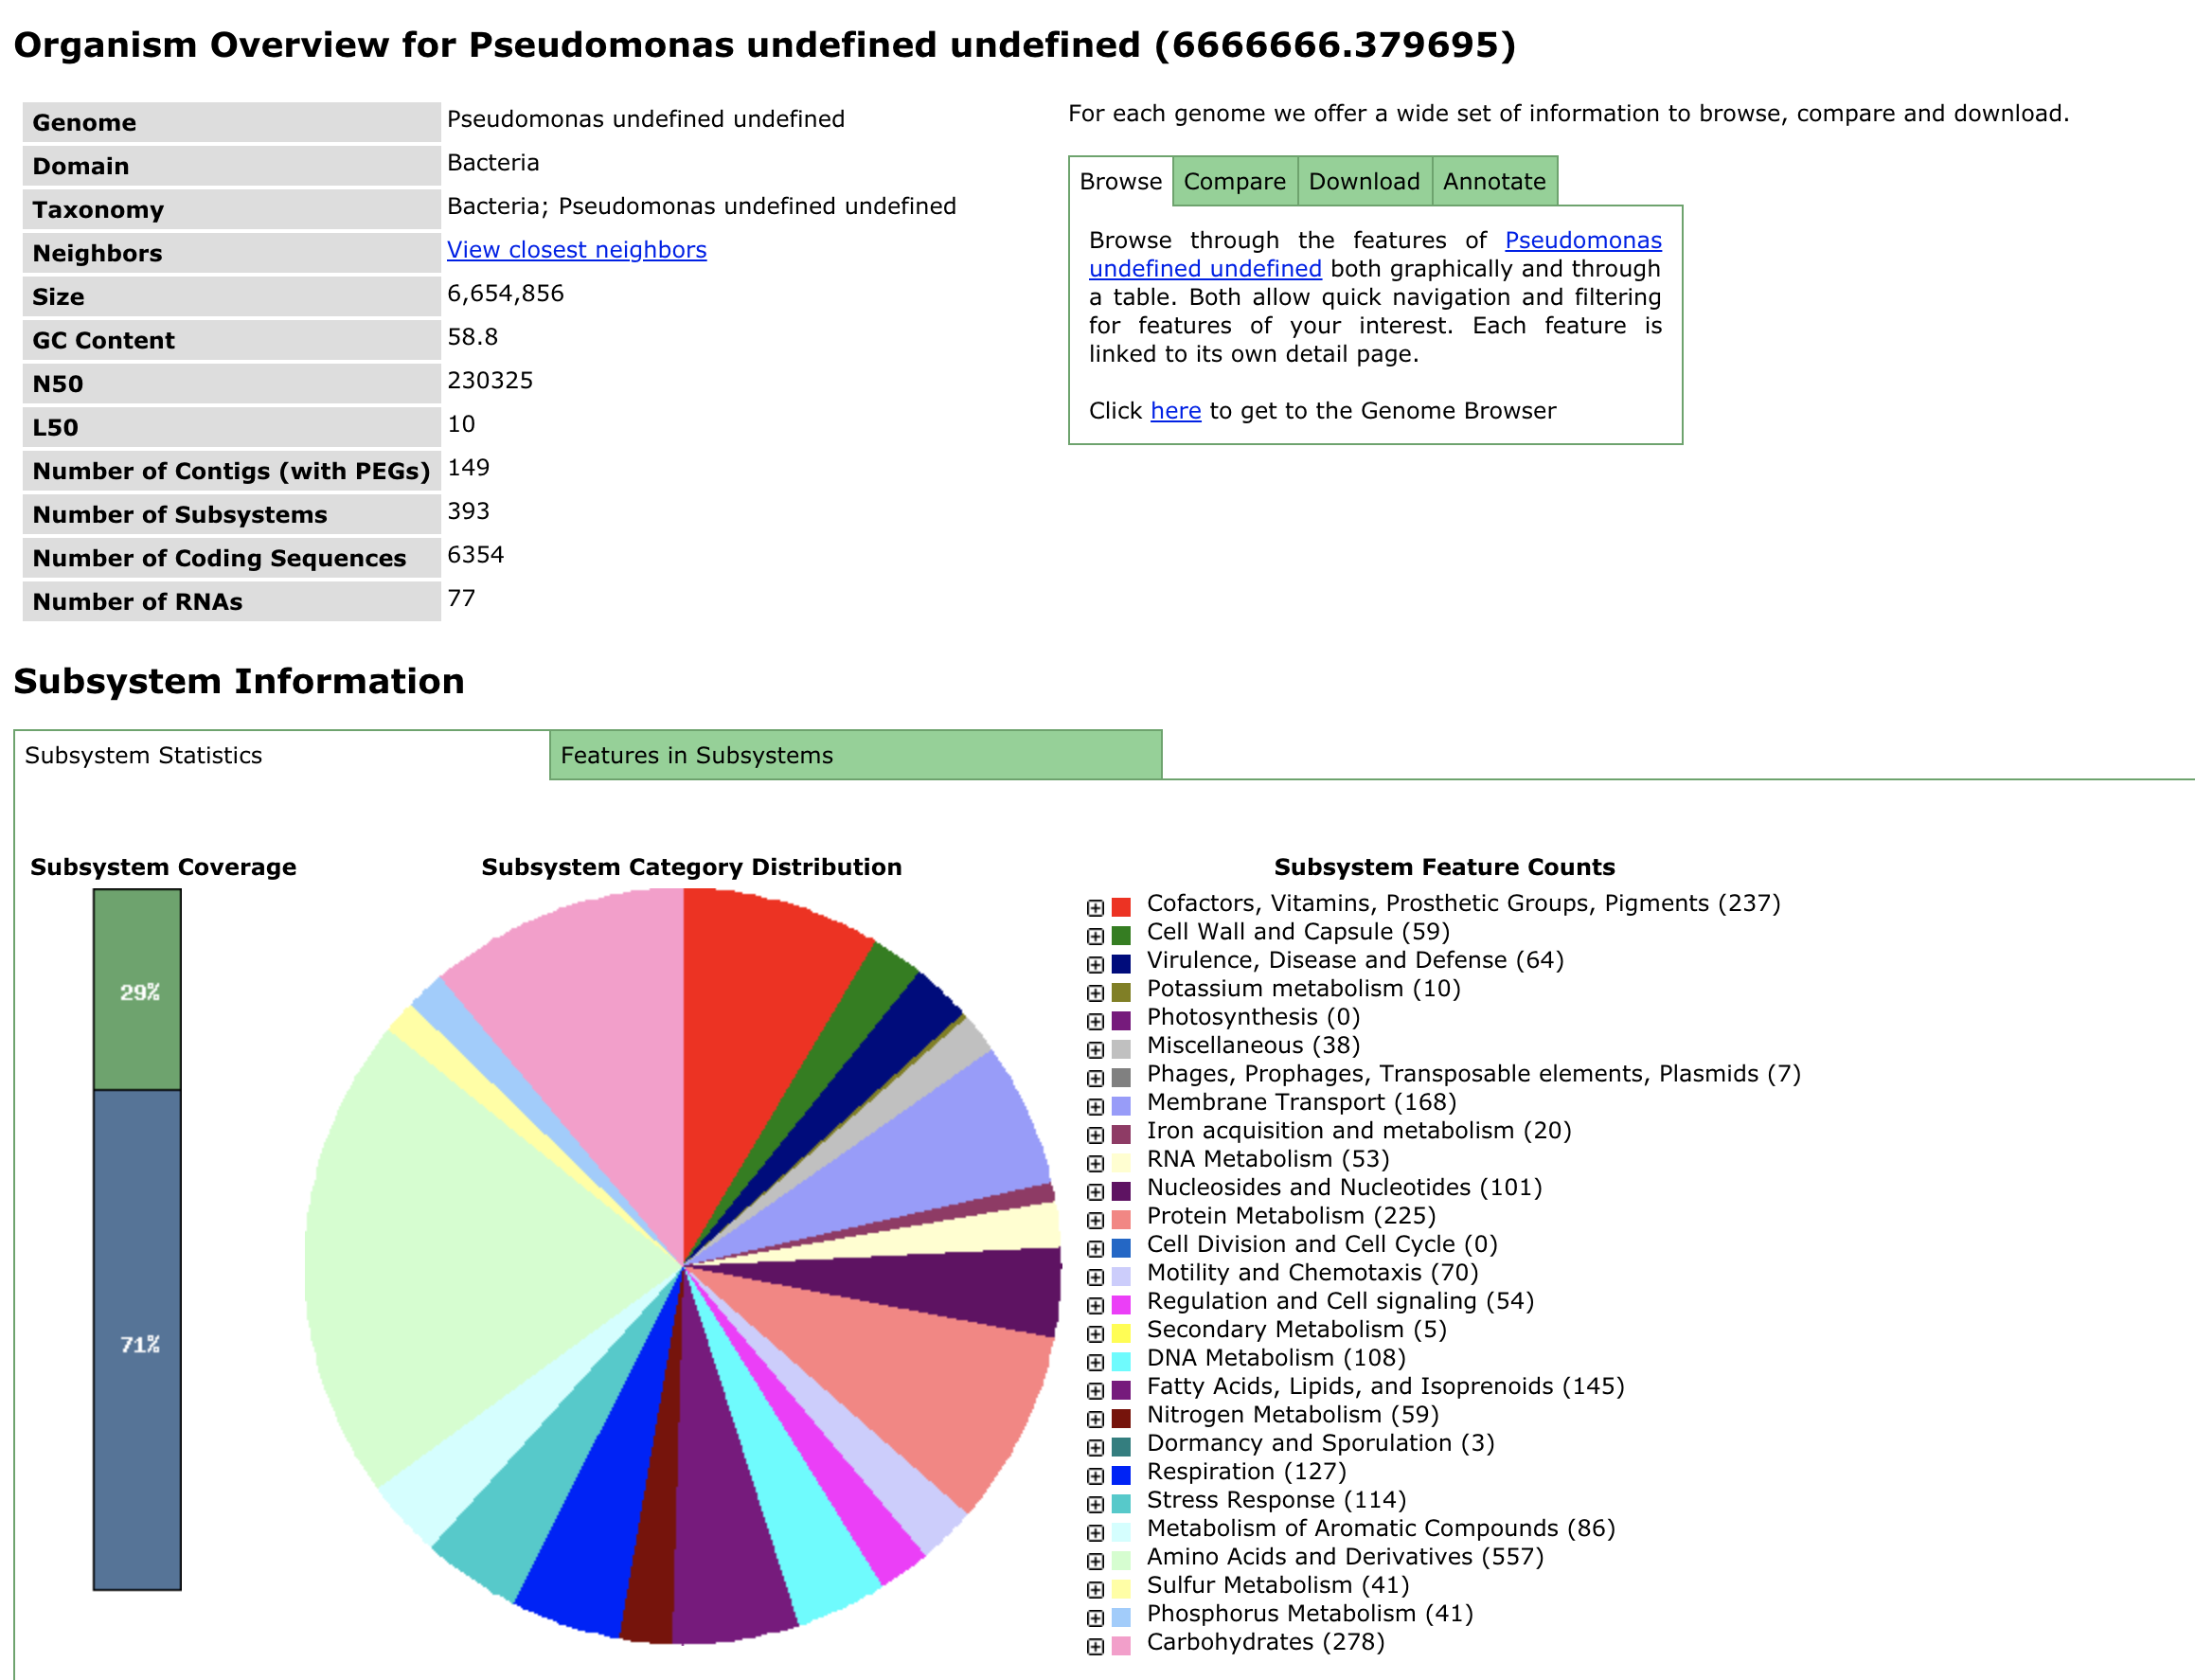

In [2]:
from IPython.display import Image, display
img7 = Image(filename = "RAST_graph.png")
img7

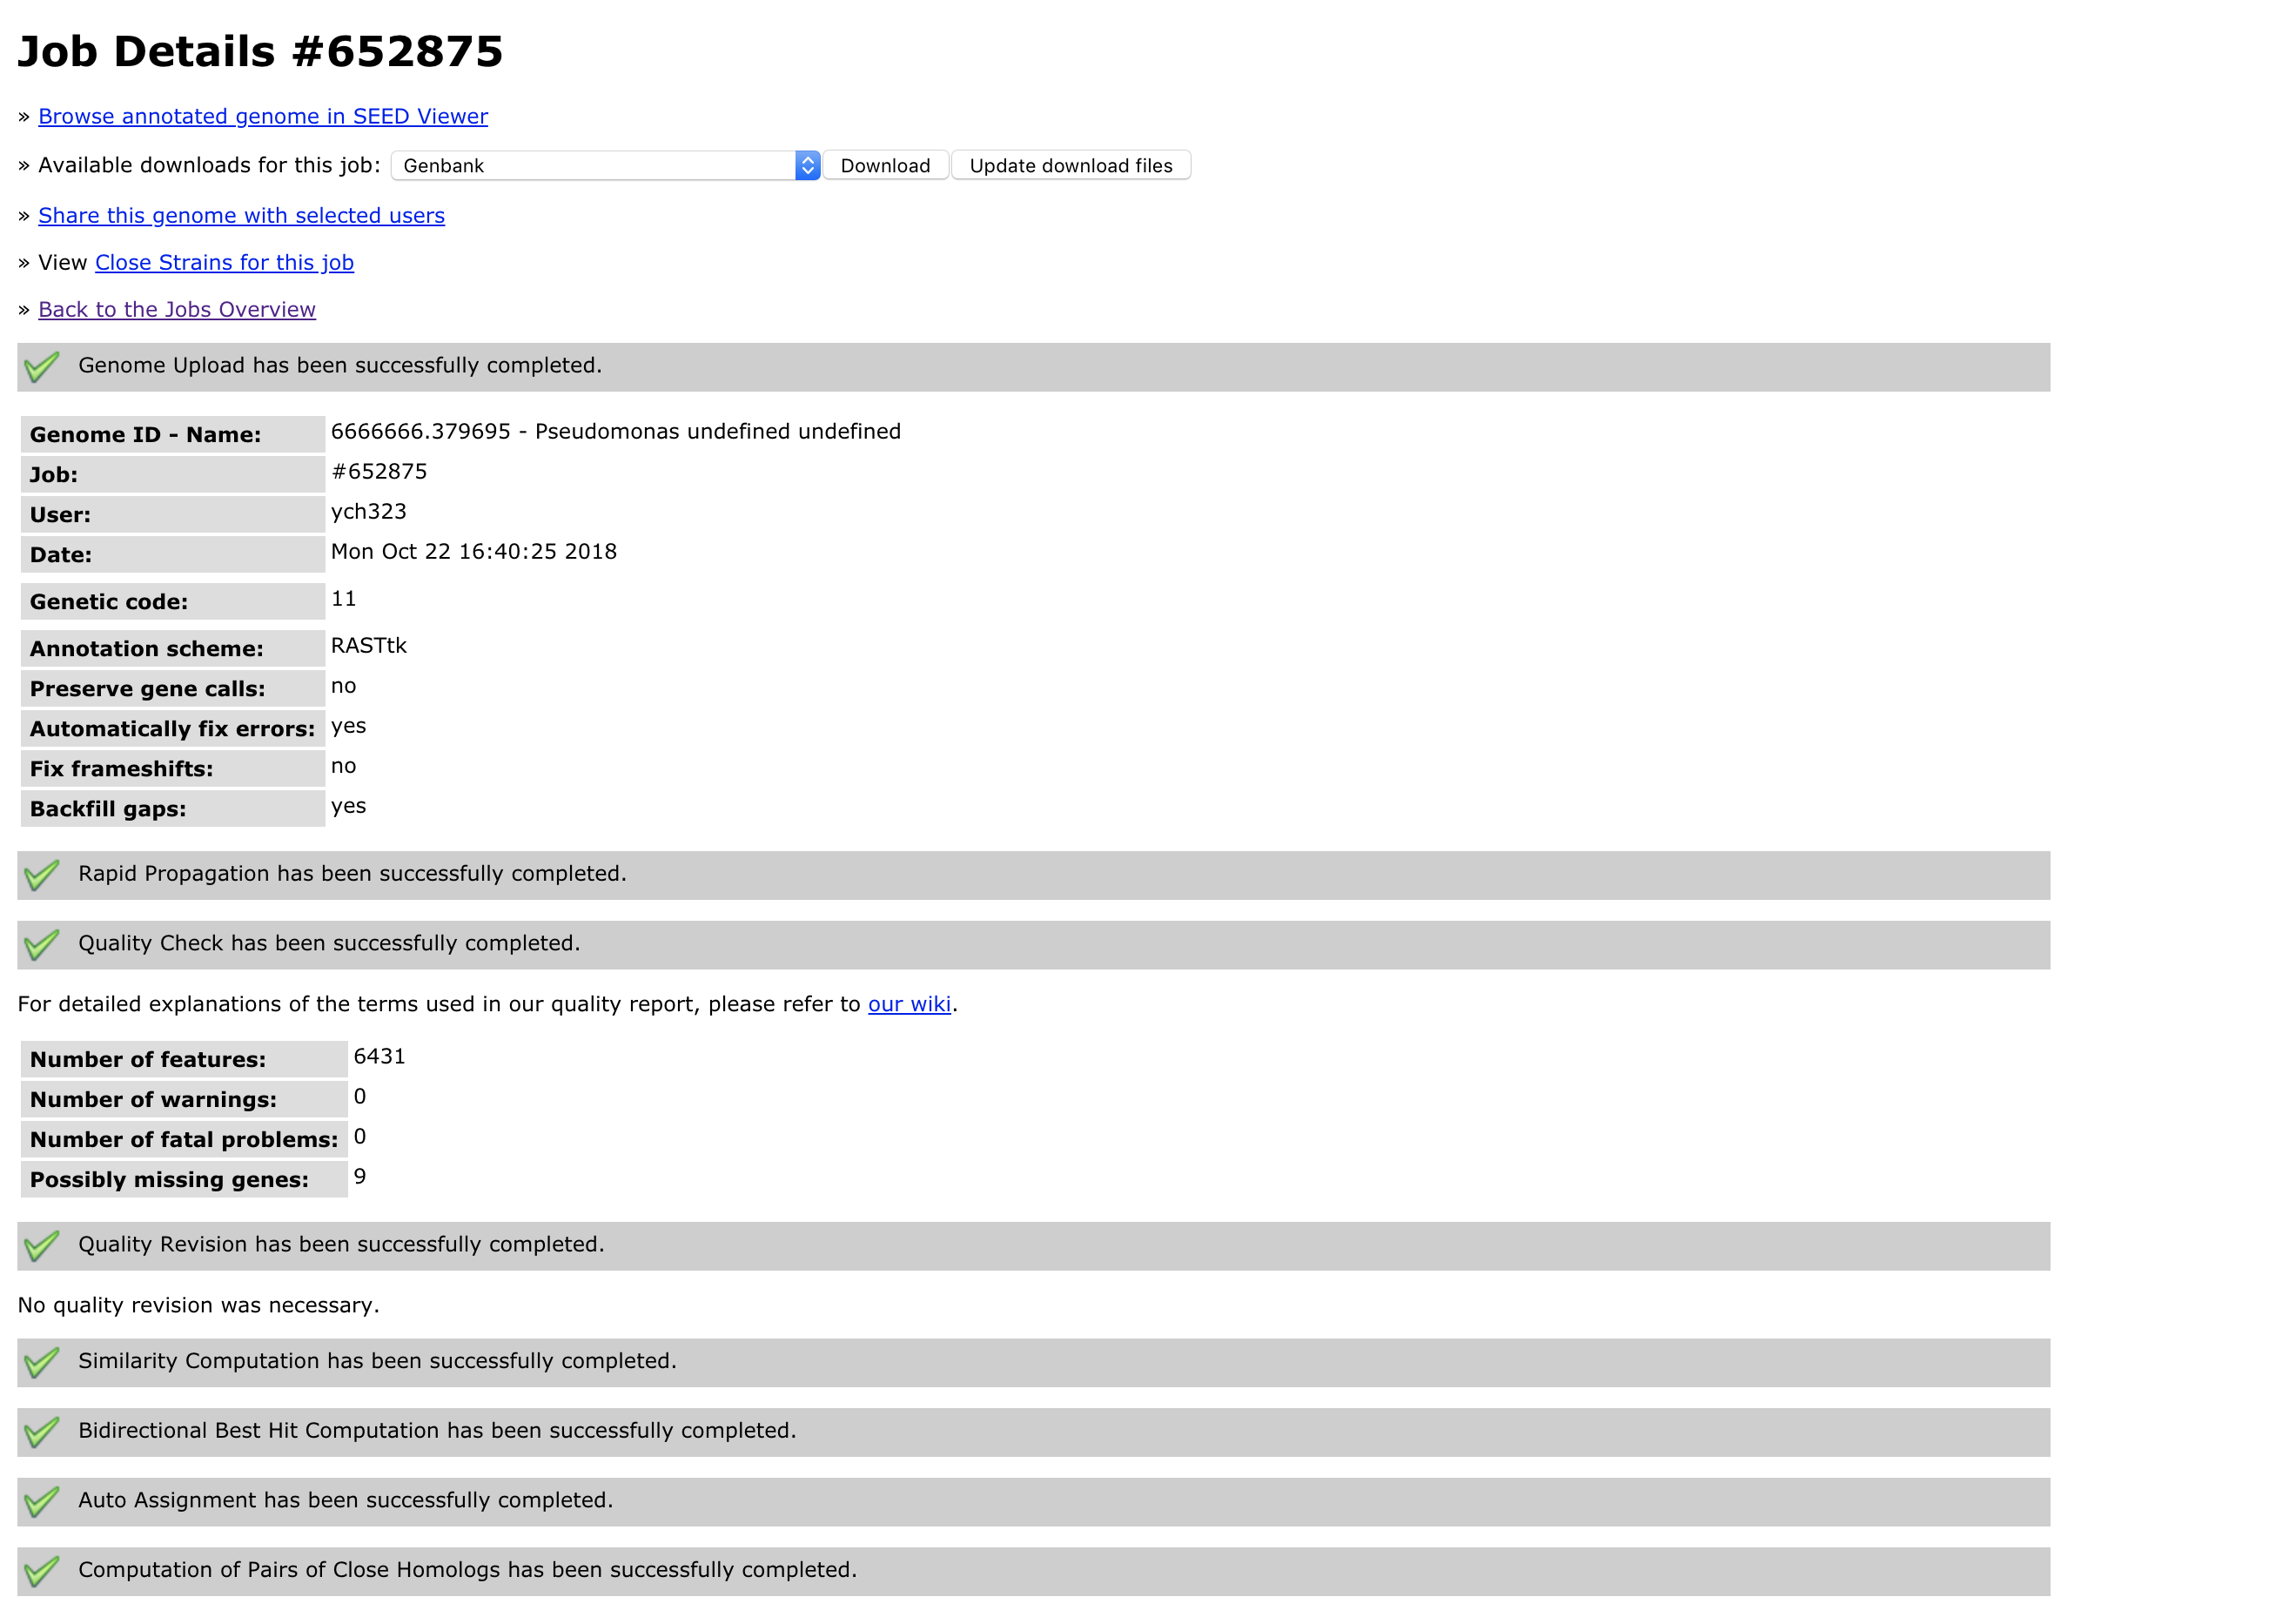

In [3]:
from IPython.display import Image, display
img8 = Image(filename = "RAST_output.png")
img8

### BASys Result

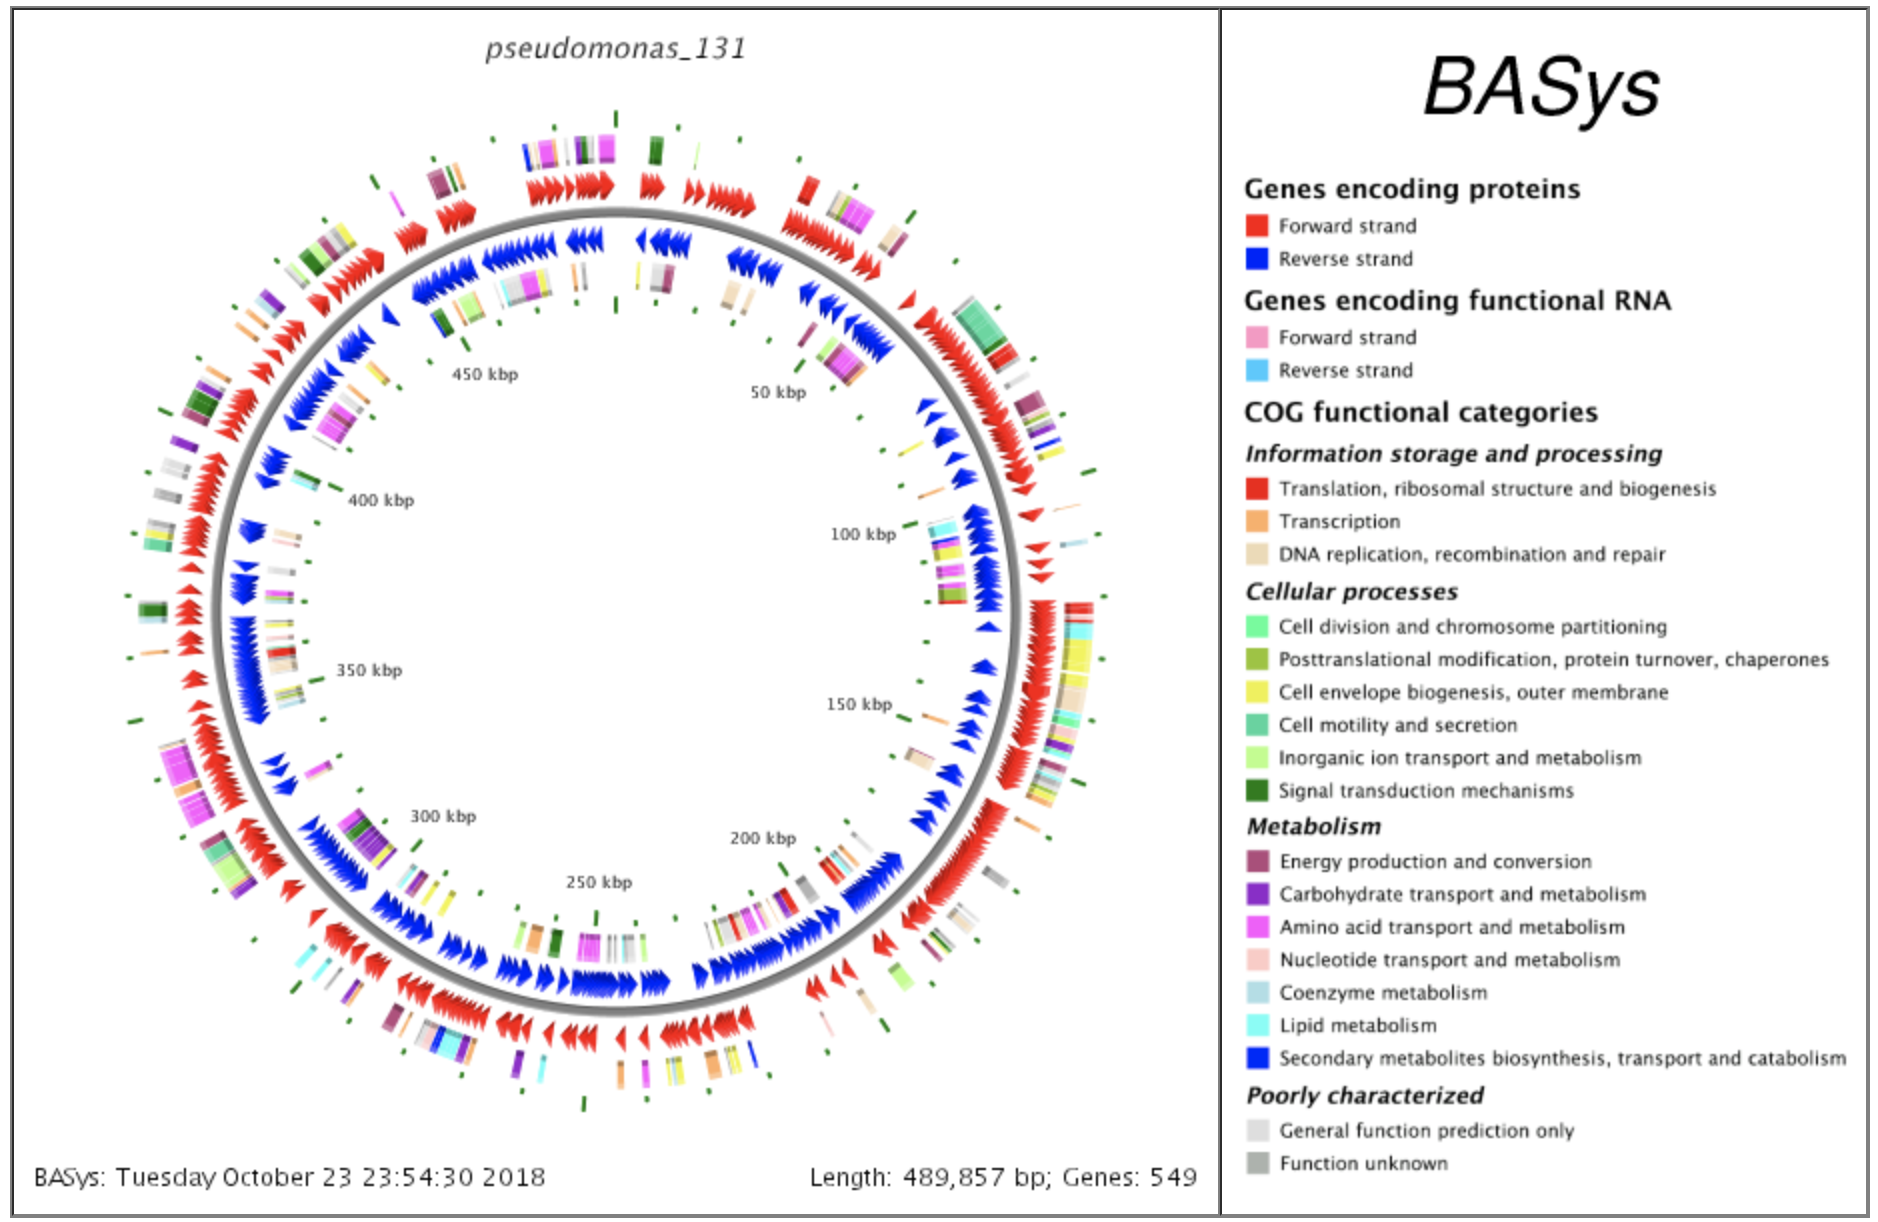

In [45]:
from IPython.display import Image, display
img1 = Image(filename = "BASys_output.png")
img1

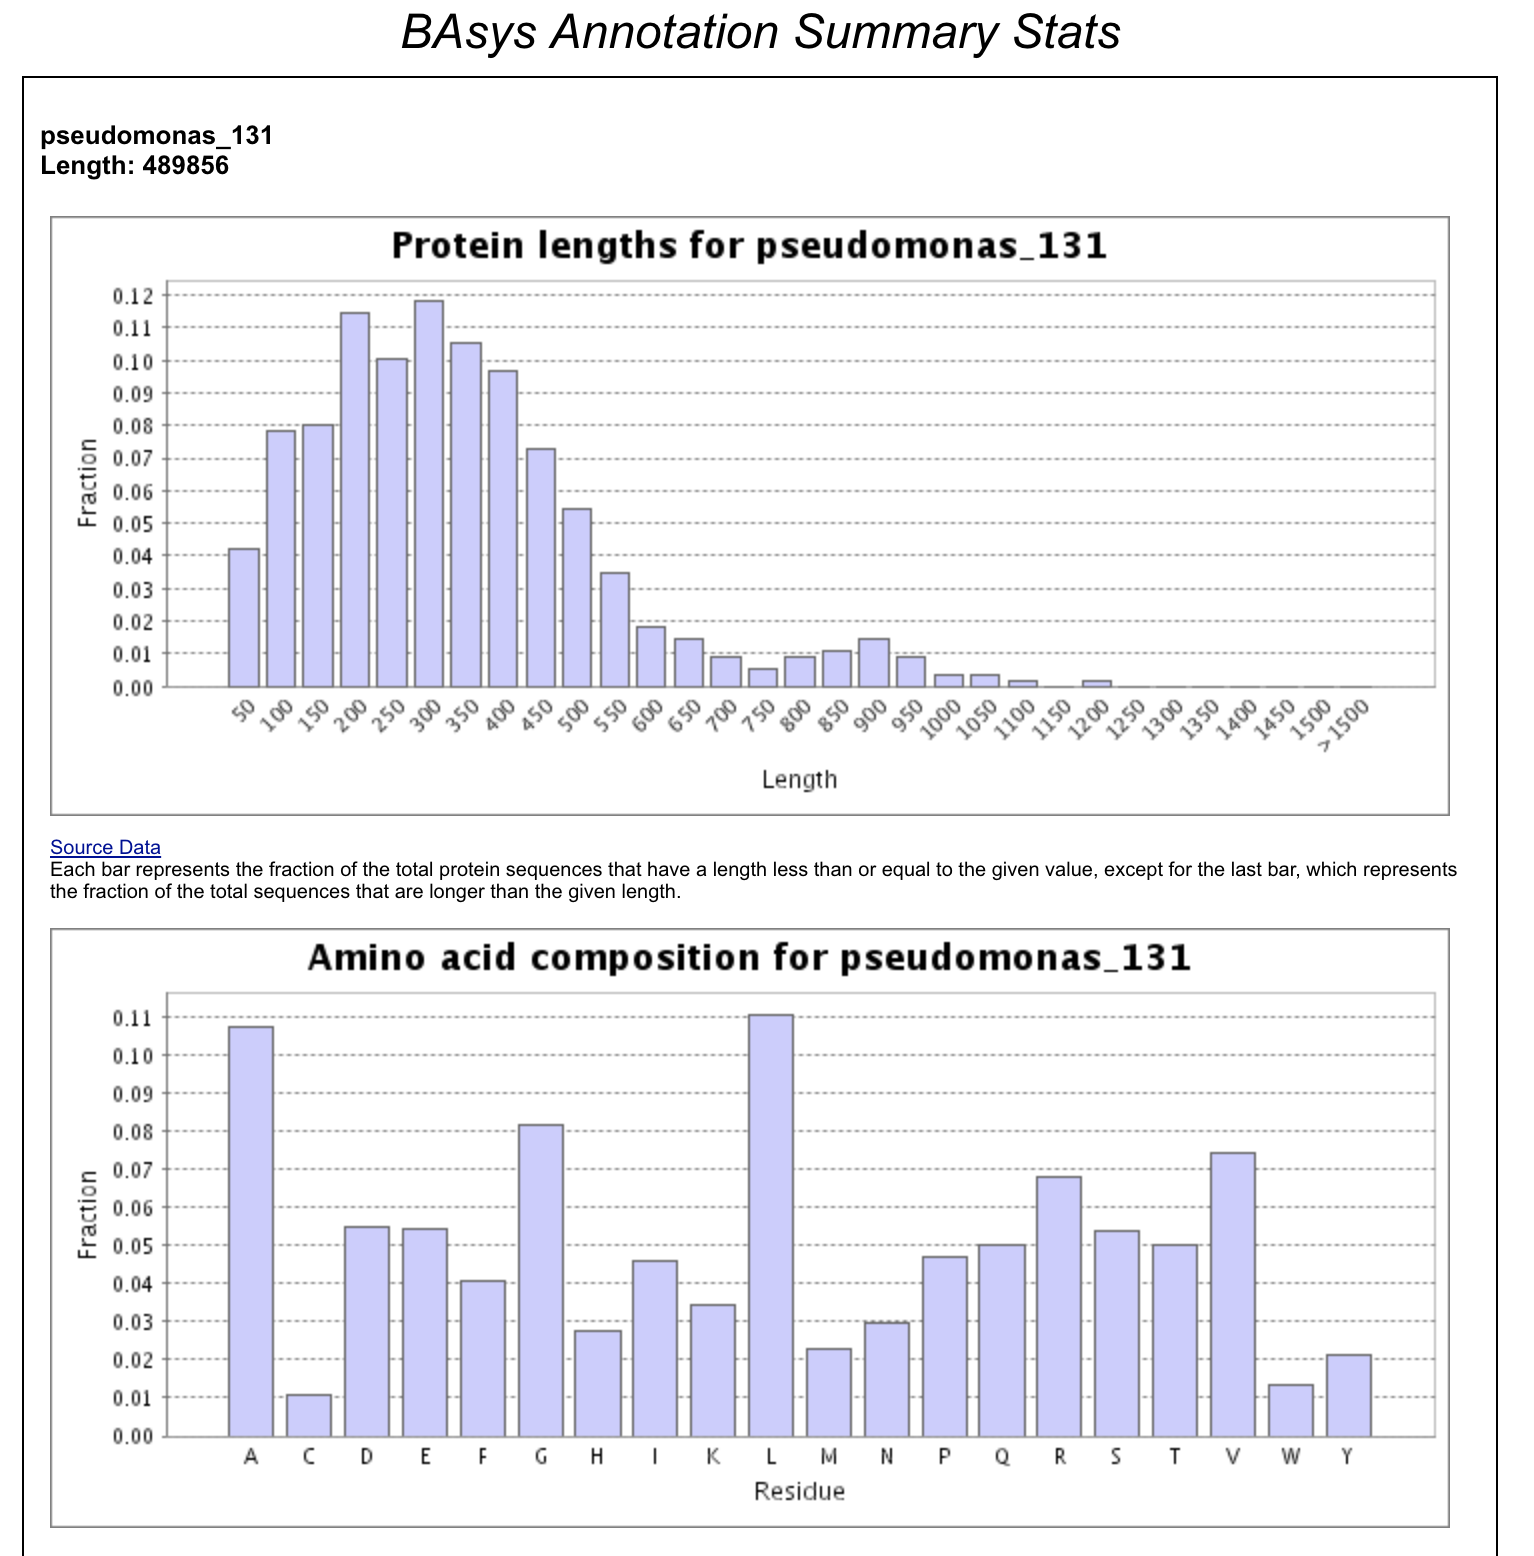

In [46]:
from IPython.display import Image, display
img2 = Image(filename = "BASys_summary.png")
img2

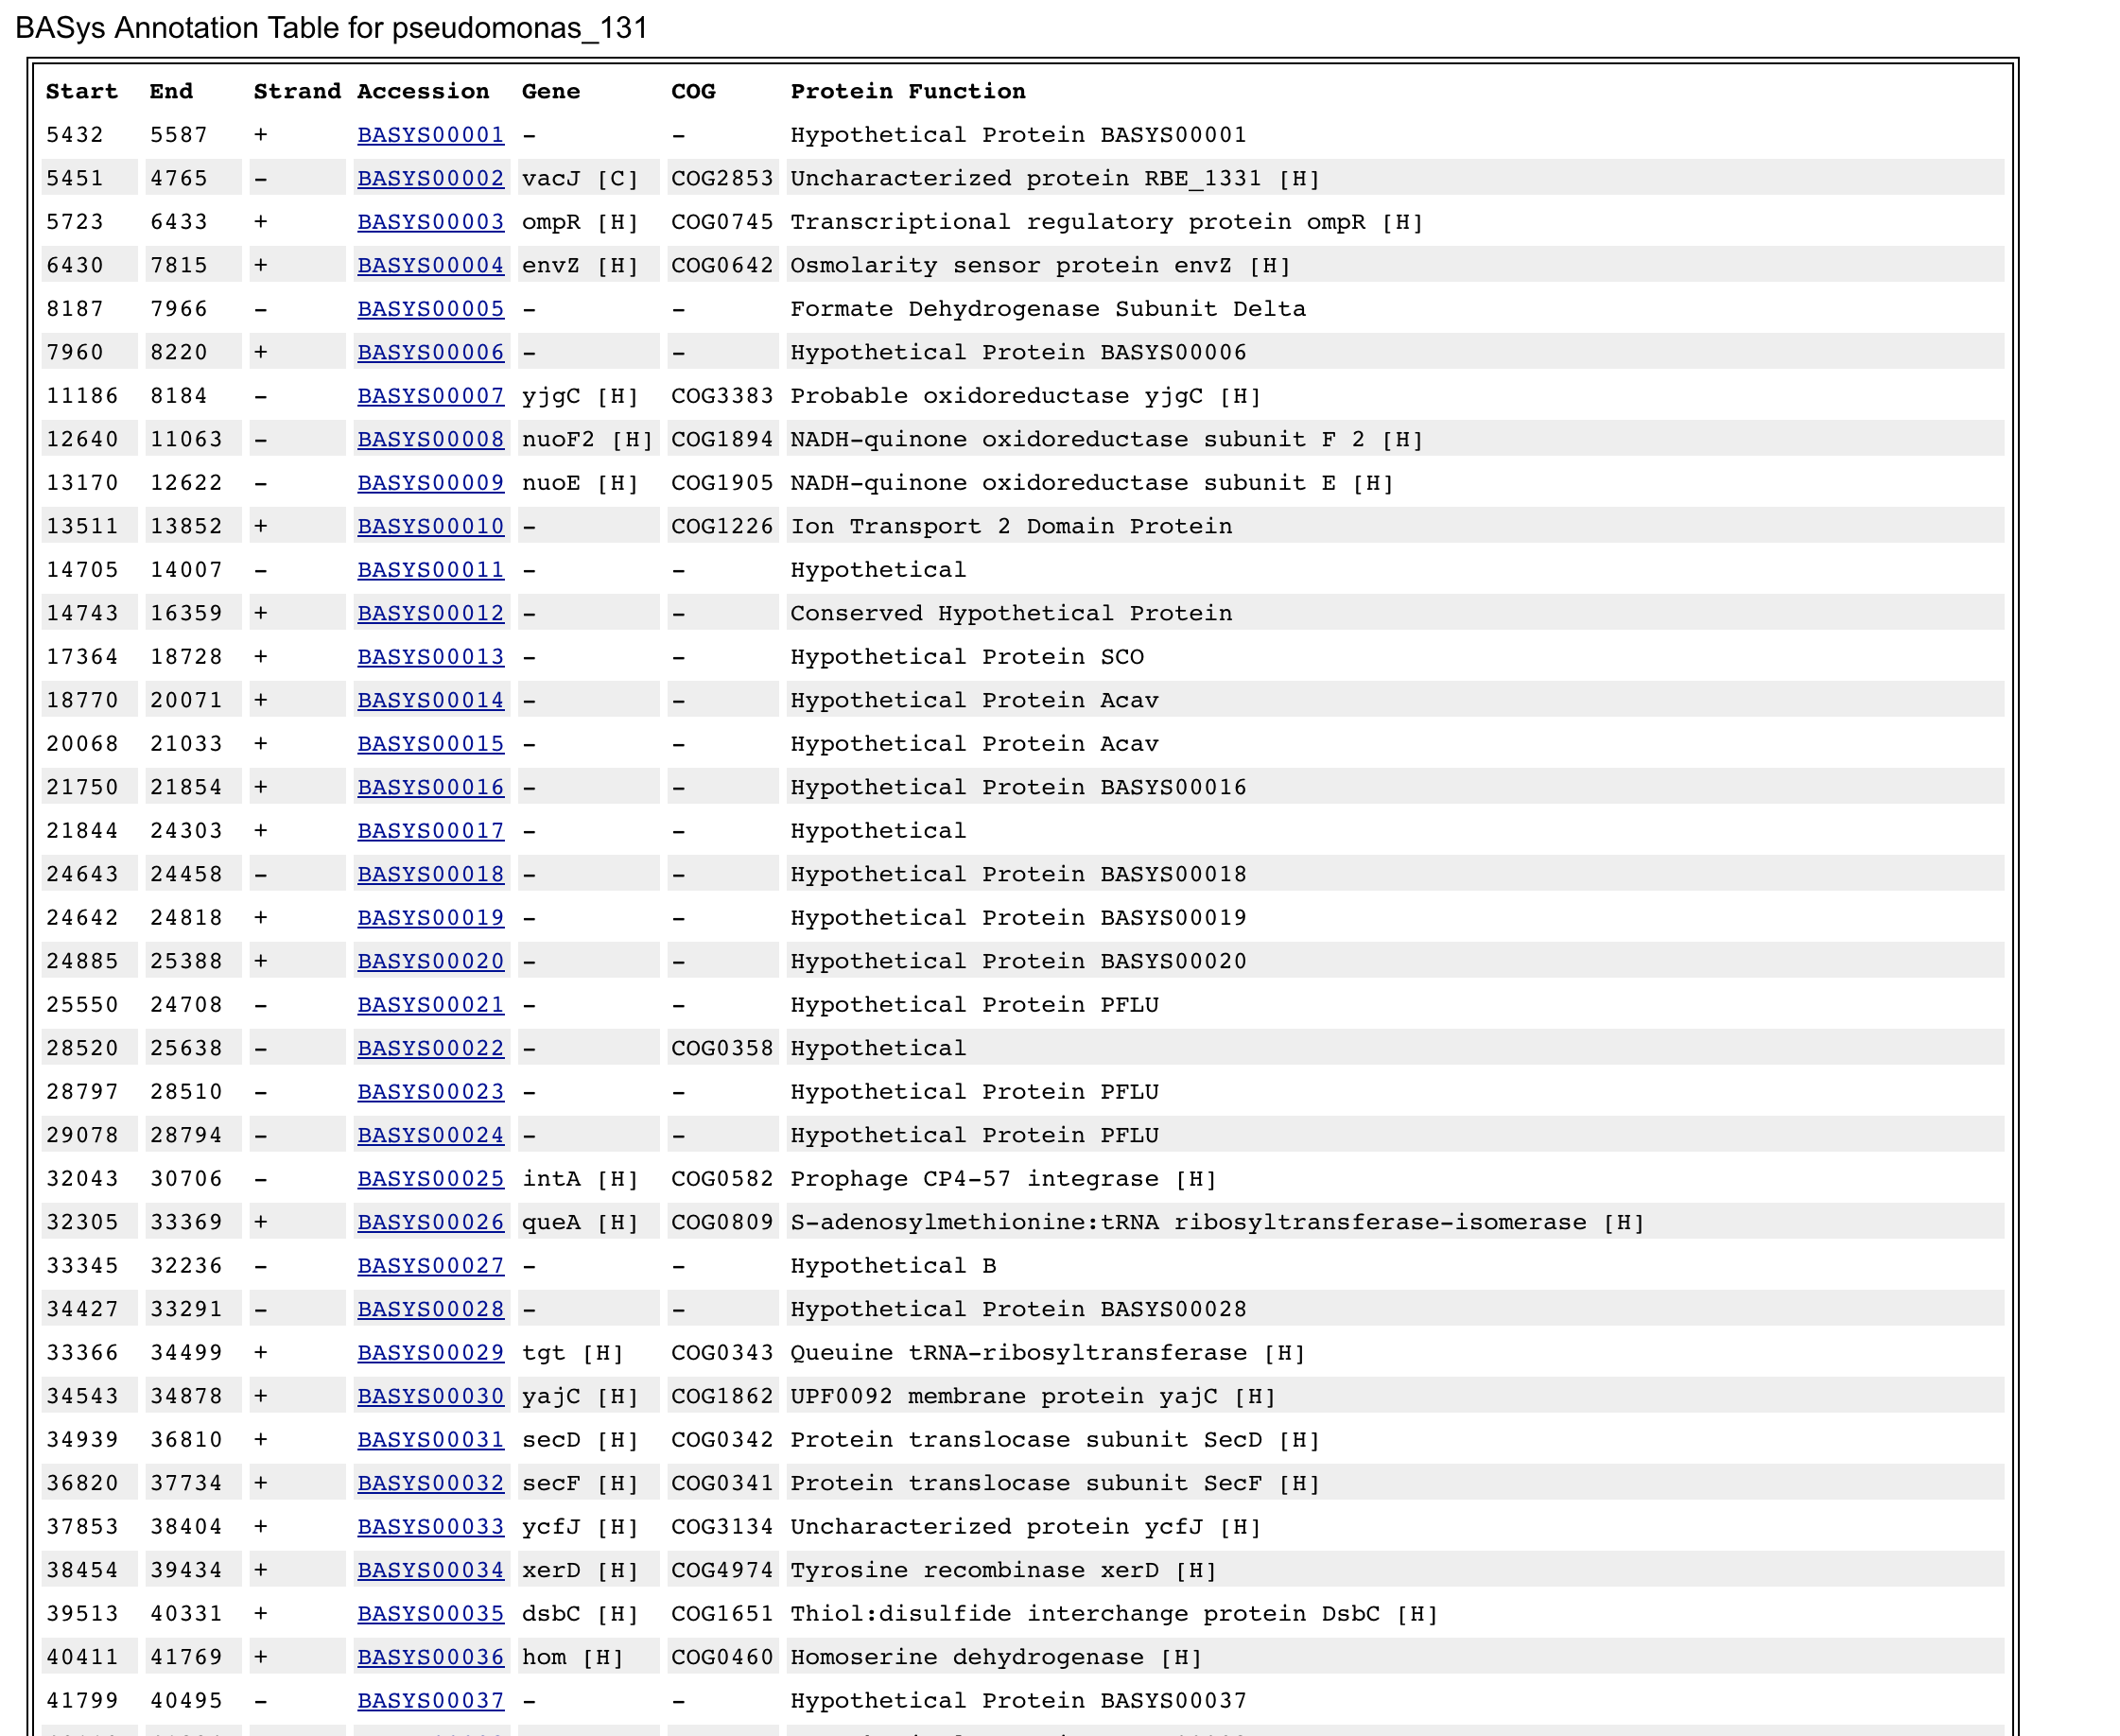

In [4]:
from IPython.display import Image, display
img5 = Image(filename = "BASys_table.png")
img5

### DFAST run output

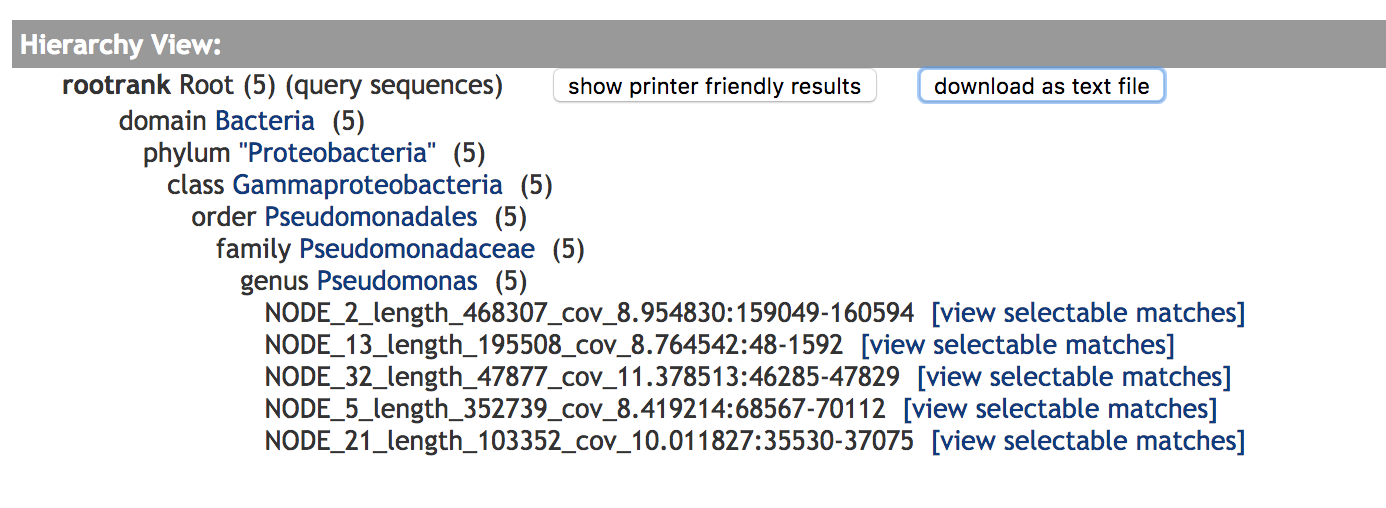

In [47]:
from IPython.display import Image, display
img3 = Image(filename = "DFAST_output.png")
img3

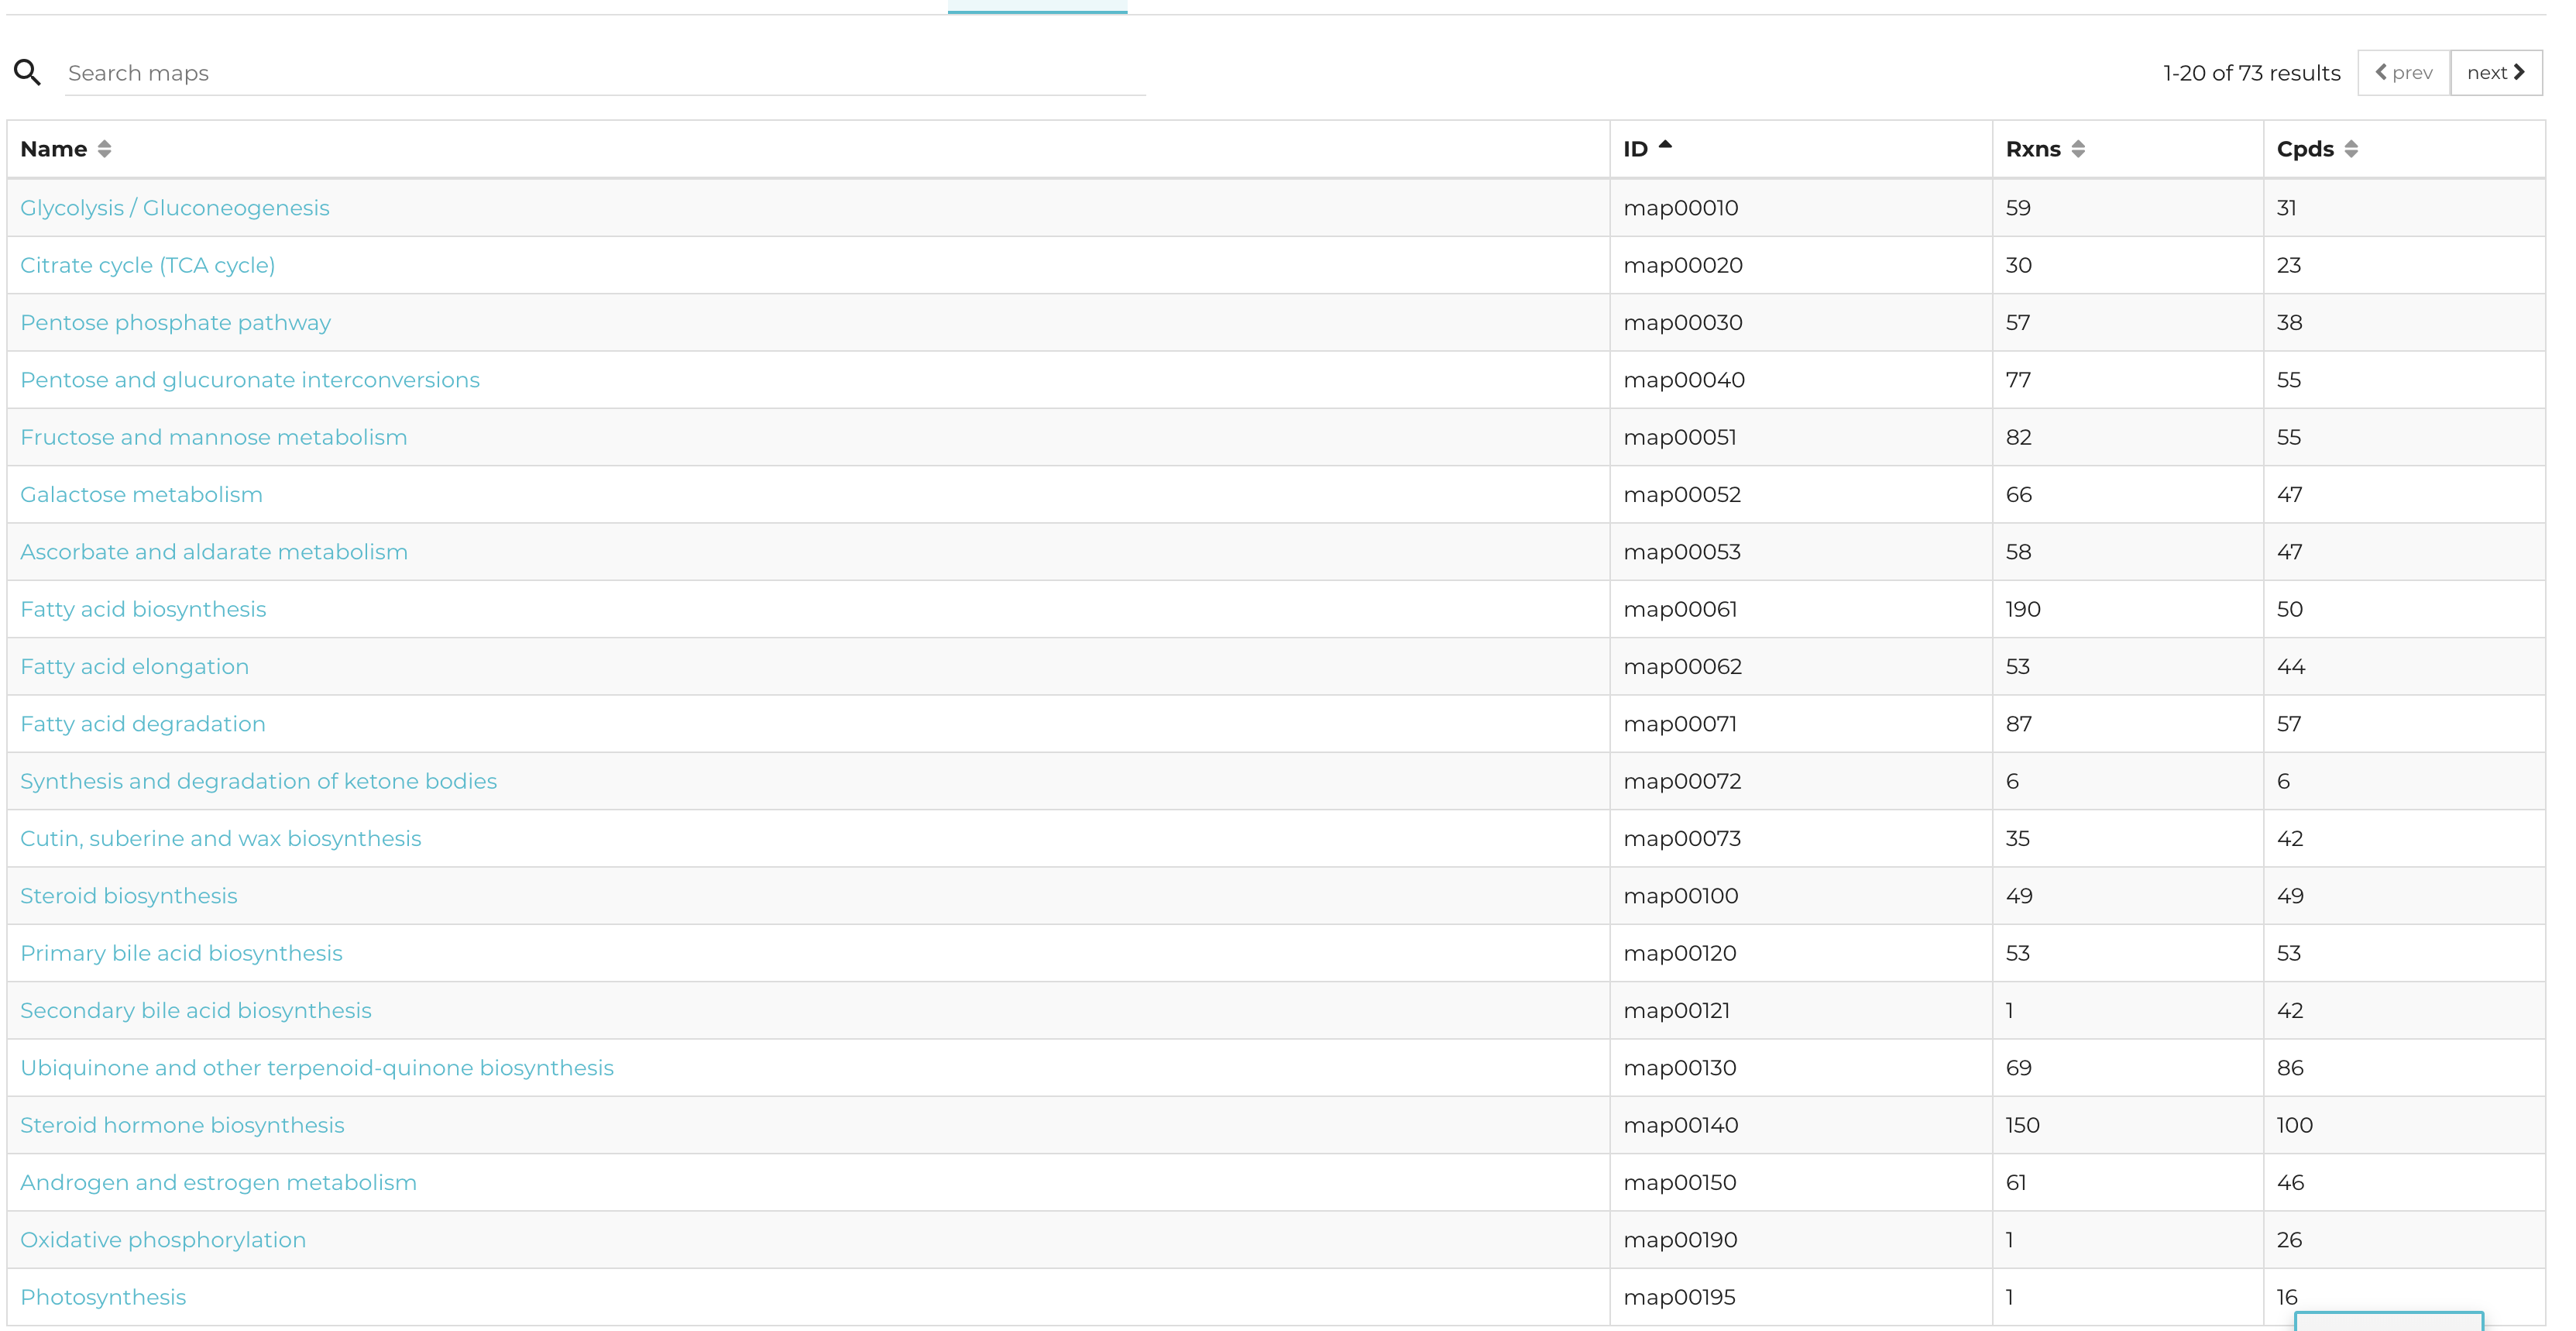

In [5]:
from IPython.display import Image, display
img4 = Image(filename = "DFAST_table.png")
img4

### Inspection of gene of interests
After the server run was done, a close inspection on the table of annotated features is done, and the following traits are selected for the genome analysis write-up:   
1. Antibiotic related:
    - antibiotic synthesis monooxygenase
    - antibiotic synthesis protein MbtH
    - type 2 antibiotic synthesis protein
2. Resistance related:
    - resistance-nodulation-cell division (RND) efflux membrane fusion protein
    - Bcr/CflA family drug resistance efflux transporter
    - fusaric acid resistance protein
    - multidrug resistance protein PmpM
    - azaleucine resistance protein AzlC
    - acriflavine resistance protein B
    - Glyoxalase/Bleomycin Resistance Protein/Dioxygenase
    - beta-lactamase
3. Toxin related:   
    - addiction module toxin, HicA family protein
    - toxin HipA
4. Pili related:
    - pilus assembly protein TadE
    - type IV pilus biogenesis protein PilZ
    - type IV-A pilus assembly ATPase PilB
5. Other:
    - penicillin-binding protein
    - penicillin amidase
    - cephalosporin hydroxylase
    - Biofilm PGA synthesis auxiliary protein PgaD

### Write-Up of Genome Analysis:
> From the genome annotation we gather, there are multiple type IV pilus assembly and biogenesis proteins including TadE, PilZ, and PilB. Thus, it is clear that the genus has adapted to live in aqueous environment. Moreover, as our annotation did not indicate the characteristics of ocean strains, which have much more sensors than freshwater strains, the relatives are of higher possibility to live in a freshwater or land region. 

> There's no auxotrophy related genes being annotated in all three servers' outputs, thus our strain is of high possibility to produce all the essential amino acids by itself. Similarly, CRISPR cas enzymes and short tandem repeats were not enriched out from the annotation. Despite a previous report of the type 2 CRISPR system in pseudomonas, our strain does not seem to come up with the CRISPR system from the annotation result. There are no virulence or bacteriophage related horizontal transfer being observed from the feature table. However, toxin related genes including HicA and HipA are observeed. 

> From literature, HicA, a mRNA interferase toxin, is originated in E.Coli species and so there's a horizontal transfer of this toxin gene from another species to our strain [1]. Moreover, multiple antibiotic production and resistance genes are present, suggesting that this Pseudomonas strain is capable of antibiotic production and antibiotic resistance. Specifically, from pFam MbtH,antibiotic synthesis monooxygenase and type 2 antibiotic synthesis protein are responsible for producing antibiotics. There are a number of resistance related proteins produced by the strain; resistance-nodulation-cell division (RND) efflux membrane fusion protein and Bcr/CflA family drug resistance efflux transporter is related to the Efflux-mediated multiresistance in Gram-negative bacteria, and the strain has specific genes responsible for the resistance towards various antibiotin in plants related to fusaric acid, azaleucine, acriflavine and bleomycin. Finally, the presence of beta-lactamse,penicillin amidase, and cephalosporin hydroxylase also functions as potential antibiotic-degrading enzymes, so that the strain may be resistant to penicillin and cephalosporin.

> Based on the phenotype analysis above, the bacteria is capable for binding to human tissue via pilus and form biofilm by Biofilm PGA synthesis auxiliary protein PgaD, can secrete toxic components and infect the mammalian tissue,and is also hard to treat due to the various display of resistance to antibiotics. The research also supports that biofilms of Pseudomonas can cause chronic opportunistic infections and cannot be treated effectively with traditional antibiotic therapy [2]. Thus, both genome annotation and secondary research lead to the consistent conclusion that the strain may be human pathogen.



### References:

1. Poole K (January 2004). "Efflux-mediated multiresistance in Gram-negative bacteria". Clinical Microbiology and Infection. 10 (1): 12–26. doi:10.1111/j.1469-0691.2004.00763.x. PMID 14706082.  
2. Cornelis P (2008). Pseudomonas: Genomics and Molecular Biology (1st ed.). Caister Academic Press. ISBN 1-904455-19-0.